In [1]:
import pandas as pd

In [2]:
annot_tweets = pd.read_parquet('annotated_tweets.parquet')
annot_tweets.shape

(1000, 24)

In [3]:
annot_tweets.head(10)

,id,tweet,highlight,not_good,polarized,tweet_bias,toxic_language,toxic_language_txt,hate_speech,hate_speech_txt,...,dehumanization,dehumanization_txt,crime_imputation,crime_imputation_txt,divisive_language,divisive_language_txt,strong_bias,strong_bias_txt,other,other_txt
0,1,"“PERDEU, MANÉ”! Foi isso mesmo que o ministro ...",1,0,1,1,0,,0,,...,0,,0,,0,,0,,0,
1,2,É fundamental q toda pessoa q está sendo imped...,1,0,1,-1,0,,0,,...,0,,0,,1,diferente do lado de lá,0,,0,
2,3,🚨 URGENTE! O diretor bolsonarista da Polícia R...,1,0,1,-1,0,,0,,...,0,,1,ISSO É UM GOLPE DE ESTADO! #Eleicoes2022,1,O diretor bolsonarista,0,,0,
3,4,"🚨URGENTE: Quer dizer que os ""patriotas"" iriam ...",1,0,1,1,0,,0,,...,1,infiltrados; terroristas,1,"infiltrados, terroristas, antifas, black block...",0,,0,,0,
4,5,Se você roubasse uma eleição em favor de um cr...,1,0,1,1,0,,0,,...,0,,1,Se você roubasse uma eleição em favor de um cr...,0,,0,,0,
5,6,"Renata Vasconcellos: ""Em época de pandemia, o ...",1,0,0,0,0,,0,,...,0,,0,,0,,0,,0,
6,7,Vamos simplificar... Poste aqui nesse tweet TO...,1,0,1,-1,0,,0,,...,0,,0,,0,,1,Bora criar uma listinha pra facilitar os traba...,0,
7,8,O mínimo que deve acontecer depois do golpismo...,1,0,1,-1,0,,0,,...,0,,1,Responsabilização da Jovem Pan,0,,0,,0,
8,9,🚨URGENTE!🚨Cacique Xavante Tserere ACABA DE SER...,0,0,1,1,0,,0,,...,0,,0,,1,Uma afronta direta ao presidente e uma escalad...,1,Uma afronta direta ao presidente e uma escalad...,0,
9,10,"No Nordeste, a Polícia Rodoviária Federal desc...",1,0,1,-1,0,,0,,...,0,,1,Polícia Rodoviária Federal descumpre a ordem j...,0,,0,,0,


In [4]:
annot_tweets.drop_duplicates(subset='tweet', ignore_index=True).shape

(1000, 24)

<Axes: xlabel='tweet_bias'>

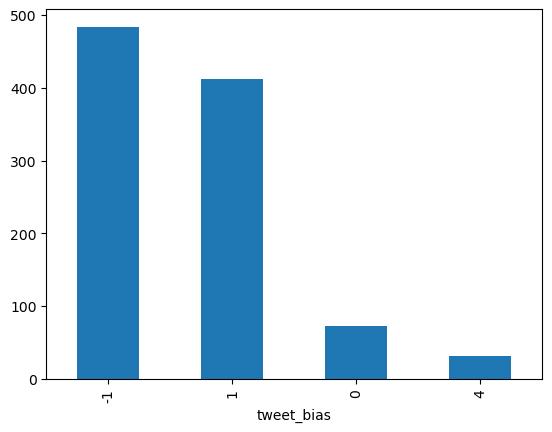

In [5]:
annot_tweets['tweet_bias'].value_counts().plot.bar()

In [6]:
left_tweets = annot_tweets[annot_tweets['tweet_bias']==-1]
left_tweets.shape

(484, 24)

In [7]:
right_tweets = annot_tweets[annot_tweets['tweet_bias']==1]
right_tweets.shape

(412, 24)

array([[<Axes: title={'center': 'highlight'}>,
        <Axes: title={'center': 'not_good'}>]], dtype=object)

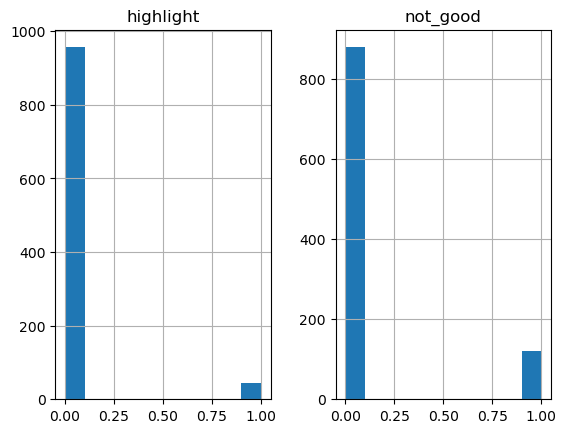

In [8]:
annot_tweets[['highlight', 'not_good']].hist()

<Axes: xlabel='tweet_bias'>

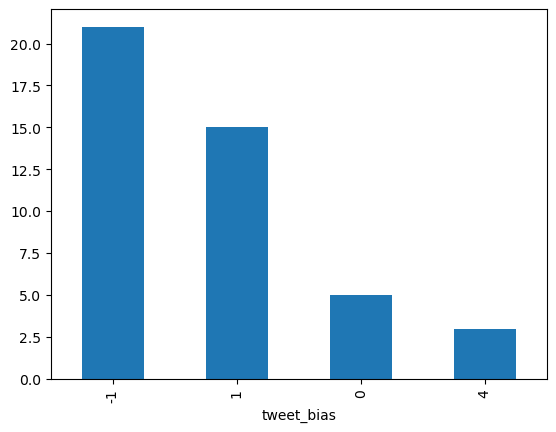

In [9]:
annot_tweets.loc[annot_tweets['highlight']==1]['tweet_bias'].value_counts().plot.bar()

<Axes: xlabel='tweet_bias'>

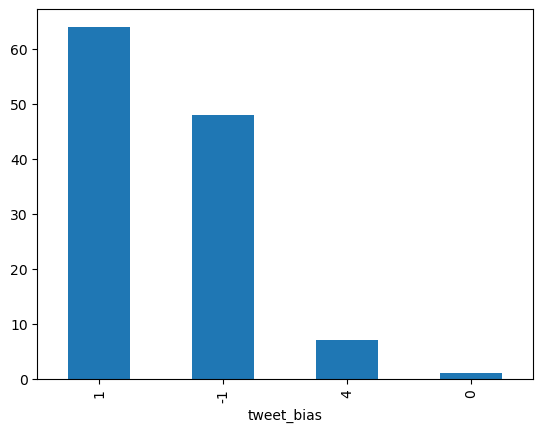

In [10]:
annot_tweets.loc[annot_tweets['not_good']==1]['tweet_bias'].value_counts().plot.bar()

<Axes: >

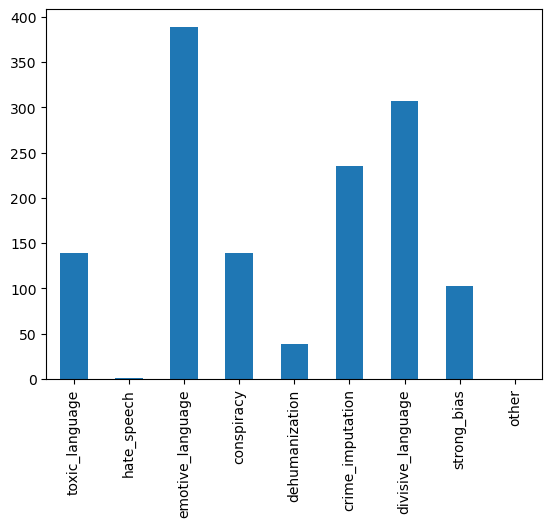

In [11]:
charac_columns = [charac for charac in annot_tweets.columns[6:] if not charac.endswith('_txt')]

annot_tweets[charac_columns].sum().plot.bar()

In [12]:
annot_tweets[charac_columns].sum()

toxic_language       139
hate_speech            1
emotive_language     389
conspiracy           139
dehumanization        38
crime_imputation     235
divisive_language    307
strong_bias          102
other                  0
dtype: int64